Проект: Мобильные приложения - выделение групп пользователей на основе их поведения.
==

## Изучение общей информации о датасетах

In [1]:
# Все импортируемые библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

! pip install -U kaleido

from plotly.subplots import make_subplots
from plotly import graph_objects as go 
from plotly.offline import plot
import plotly.express as px
import seaborn as sns

import scipy.stats as stats
import math as mth

import warnings
warnings.simplefilter('ignore')

In [2]:
# Загружаю датасет

try:
    mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
    mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
except:
    s=open(r'C:\Users\User\Desktop\Downloads\mobile_sourсes.csv')
    d=open(r'C:\Users\User\Desktop\Downloads\mobile_dataset.csv')
    mobile_sourсes = pd.read_csv(s)
    mobile_dataset = pd.read_csv(d)
    # для локального доступа

In [3]:
display(mobile_sourсes.head())
display(mobile_dataset.head())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
# Посмотрю общую информацию по датасетам

mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [5]:
mobile_dataset.info()

# Необходимо изменить тип данных в столбце event.time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
# Проверю, за какой период есть данные

display('Минимальная дата событий:', mobile_dataset['event.time'].min())
display('Максимальная дата событий:', mobile_dataset['event.time'].max())

'Минимальная дата событий:'

'2019-10-07 00:00:00.431357'

'Максимальная дата событий:'

'2019-11-03 23:58:12.532487'

**Вывод**

Датасет 'mobile_dataset' содержит информацию о пользователях, совершенных ими событиях и времени совершения этих событий. Всего в датасете 74197 строк. Есть данные за период совершения событий с 7 октября 2019г по 3 ноября 2019г.

Столбец 'event.time' имеет некорректный тип, необходимо заменить его на этапе предобработки данных. Также необходимо произвести замену названия столбцов. 

Датасет 'mobile_sourсes' содержит информацию о пользователях и источниках, с которого пользователь установил приложение. Всего в датасете 4293 строк. Типы данных корректны, необходимо изменить название столбца 'userId'.

## Предобработка данных

### Корректировка названия/типов столбцов

In [7]:
# Изменю названия столбцов

mobile_sourсes = mobile_sourсes.rename(columns={'userId':'user_id'})

mobile_dataset.columns = [x.lower().replace('.', '_') for x in mobile_dataset.columns.values]

In [8]:
display(mobile_sourсes.head())
display(mobile_dataset.head())

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [9]:
# Изменю тип столбца event_time

mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])

In [10]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Обработка явных/неявных дубликатов

In [11]:
# Проверю дубликаты

display(mobile_sourсes.duplicated().sum())
display(mobile_dataset.duplicated().sum())

0

0

In [12]:
# Проверю, какие есть события

mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

Есть следующие события:

1. advert_open - открытие карточки объявления
2. tips_show - пользователь увидел рекомендованные объявления
3. map - пользователь открыл карту размещенных объявлений
4. contacts_show - пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления 
5. show_contacts - это тоже самое, заменю название на contacts_show
6. tips_click - пользователь кликнул по рекомендованному объявлению
7. photos_show - просмотр фотографий в объявлении
8. favorites_add - добавление объявления в избранное
9. contacts_call - пользователь позвонил по номеру телефона на карточке объявления
10. search_1 - search_7 - разные события, связанные с поиском по сайту. Объединю их в одну группу, т.к для текущего анализа важен сам факт события - поиск по сайту.

In [13]:
# Меняю название события 'show_contacts'

mobile_dataset['event_name'] = mobile_dataset['event_name'].str.lower().str.replace('show_contacts', 'contacts_show')

In [14]:
# Объединю 'search_1' - 'search_7' в одно событие 

mobile_dataset = mobile_dataset.replace({'event_name':{
    'search_1':'search',
    'search_2':'search',
    'search_3':'search',
    'search_4':'search',
    'search_5':'search',
    'search_6':'search',
    'search_7':'search'
}})


In [15]:
# Проверю результат

mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

### Обработка пропущенных значений

In [16]:
# Проверю пропуски

display(mobile_sourсes.isna().sum())
display(mobile_dataset.isna().sum())

user_id    0
source     0
dtype: int64

event_time    0
event_name    0
user_id       0
dtype: int64

**Вывод**

Была проведена следующая предобработка данных:

- Скорректировано название столбцов
- Изменен тип столбца 'event_time' на временной тип данных
- Явных дубликатов не обнаружено. Были объеденены группы 'contacts_show' и 'show_contacts' в одну, т.к это одно действие - пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления. Группы 'search_1' - 'search_7' - это разные события, связанные с поиском по сайту. Для текущего анализа важен сам факт события - поиск по сайту, поэтому я их объединила в одну группу 'search'.
- Пропуски не обнаружены

## Исследование общего поведения пользователей

In [17]:
# Для начала я объединю таблицы

sessions = mobile_dataset.merge(mobile_sourсes, on='user_id', how='outer')

# Изменю порядок столбцов 

sessions = sessions[['user_id', 'event_name', 'event_time', 'source']]

sessions.head()

,user_id,event_name,event_time,source
0,020292ab-89bc-4156-9acf-68bc2783f894,advert_open,2019-10-07 00:00:00.431357,other
1,020292ab-89bc-4156-9acf-68bc2783f894,tips_show,2019-10-07 00:00:01.236320,other
2,020292ab-89bc-4156-9acf-68bc2783f894,tips_show,2019-10-07 00:00:07.039334,other
3,020292ab-89bc-4156-9acf-68bc2783f894,advert_open,2019-10-07 00:01:27.770232,other
4,020292ab-89bc-4156-9acf-68bc2783f894,tips_show,2019-10-07 00:01:34.804591,other


### Retention rate

Для начала создам профили пользователей, с датой первого посещения и источником перехода на сайт.

In [18]:
# Функция профилей

def get_profiles(x):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения event_time и source
    # столбец с временем первого посещения назовём first_ts
    profiles = (
        x.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'source': 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [19]:
# Вызову функцию

profiles = get_profiles(sessions)


In [20]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   4293 non-null   object        
 1   first_ts  4293 non-null   datetime64[ns]
 2   source    4293 non-null   object        
 3   dt        4293 non-null   object        
 4   month     4293 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 167.8+ KB


Получилось 4293 профиля пользователей. Посмотрю, как привлекались новые пользователи по времени и по источнику, с которого было установлено приложение.

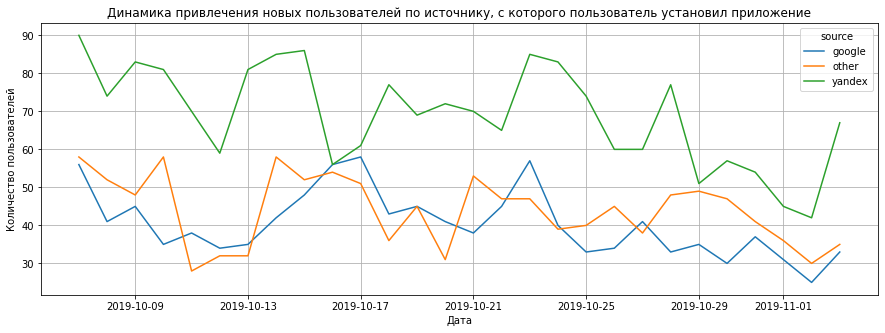

In [21]:
# График динамики привлечения новых пользователей по 'source'

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.title('Динамика привлечения новых пользователей по источнику, с которого пользователь установил приложение')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')

plt.show()

**Вывод**

На графике видно, что через 'yandex' установлено больше всего приложений. Наблюдаются колебания на всем рассматриваемом периоде, падение количества пользователей, пришедших из 'yandex' 29 октября и после. Общая тенденция также идет к снижению. В последний изучаемый день наблюдается рост из всех источников.

Профили содержат информацию о первых визитах пользователей на сайт, но для расчёта Retention Rate нужны данные обо всех посещениях из журнала сессий. Добавлю их.

In [22]:
# Функция Retention rate по дням

def get_retention(y):
    # присоединяю event_time к профилям по столбцу user_id
    result_raw = y.merge(
    sessions[['user_id', 'event_time']], on='user_id', how='left'
    )
    # вычисляю лайфтайм для каждой сессии в днях
    result_raw['lifetime'] = (
    result_raw['event_time'] - result_raw['first_ts']
    ).dt.days
    # строю таблицу удержания
    result_grouped = result_raw.pivot_table(
    index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    # вычисляю размеры когорт
    cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
    )
    # объединяю размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left'
    ).fillna(0)

    # делю данные таблицы удержания на размеры когорт

    result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
    ).drop(columns=['cohort_size'])

    # Удалю первый столбец, там общее число = 1
    result_grouped = result_grouped.drop([0], axis=1)

    # Retention Rate пользователей:

    return result_grouped

In [23]:
# Функция Retention rate по недельным когортам

def week_retention(x):
    # присоединяю event_time к профилям по столбцу user_id
    result_raw = x.merge(
    sessions[['user_id', 'event_time']], on='user_id', how='left'
    )
    result_raw['week_event'] = pd.to_datetime(result_raw['event_time']).dt.week
    # вычисляю лайфтайм для каждой сессии в днях
    result_raw['lifetime'] = (
    (result_raw['week_event'] - result_raw['week'])
    )
    # строю таблицу удержания
    result_grouped = result_raw.pivot_table(
    index=['week'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    # вычисляю размеры когорт
    cohort_sizes = (
    result_raw.groupby('week')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
    )
    # объединяю размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
    result_grouped, on='week', how='left'
    ).fillna(0)
    # делю данные таблицы удержания на размеры когорт

    result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
    ).drop(columns=['cohort_size'])
    
    # Удалю первый столбец, там общее число = 1
    result_grouped = result_grouped.drop([0], axis=1)

    # Retention Rate пользователей:

    return result_grouped

In [24]:
# Retention Rate пользователей:
get_retention(profiles)
retention_rate = get_retention(profiles)
retention_rate.head(3)

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,
2019-10-07,0.122549,0.098039,0.107843,0.053922,0.039216,0.058824,0.078431,0.053922,0.049020,0.049020,...,0.019608,0.044118,0.024510,0.014706,0.019608,0.034314,0.034314,0.039216,0.044118,0.029412
2019-10-08,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892,0.071856,0.059880,0.041916,0.059880,...,0.029940,0.017964,0.047904,0.035928,0.017964,0.023952,0.041916,0.029940,0.023952,0.011976
2019-10-09,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818,0.073864,0.062500,0.034091,0.022727,...,0.017045,0.011364,0.028409,0.011364,0.034091,0.011364,0.005682,0.022727,0.017045,0.000000


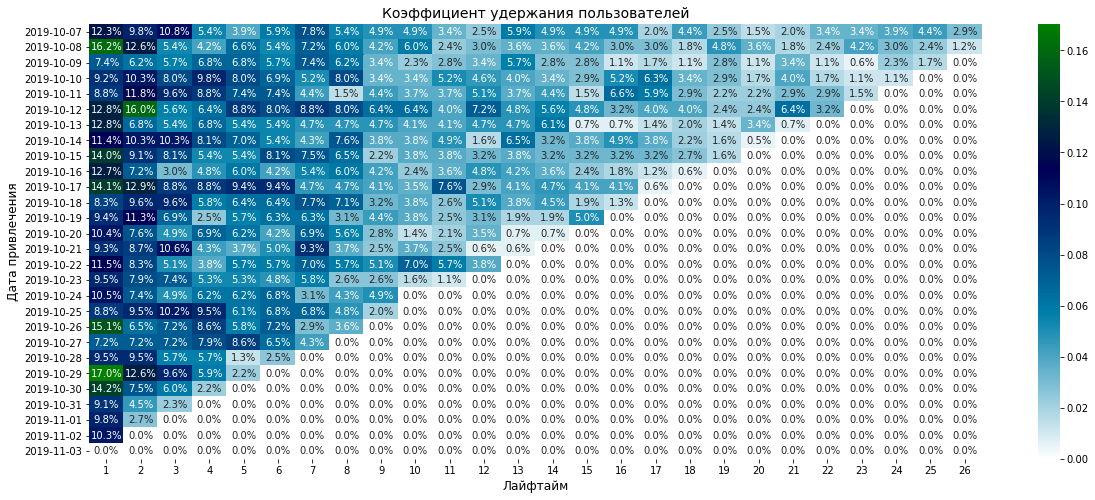

In [25]:
# График удержания

plt.figure(figsize = (20,8))

sns.heatmap(retention_rate, cmap= "ocean_r", annot= True, fmt='.1%')

plt.title('Коэффициент удержания пользователей', fontsize = 14)
plt.xlabel('Лайфтайм', fontsize = 12)
plt.ylabel('Дата привлечения', fontsize = 12)
plt.show()

**Вывод**

Видим пиковый день удержания на 1 день лайфтайма для пользователей, привлеченных 29 октября. А если вспомнить график динамики привлечения новых пользователей, то именно 29 октября было падение у пользователей из yandex и явный рост у пользователей, пришедших из иных источников. 

В целом, отмечается падение удержания в последние дни: для пользователей от 31 октября - 2 день лайфтайма удержание всего 4.5%, а для пользователей от 1 ноября - на 2 день лайфтайма удержание и вовсе 2.7%. Т.е и привлекаться стало меньше клиентов, и удерживаются они хуже. Стоит разобраться, это случайность или что-то идет не так?

Посмотрю результаты по недельным когортам.

In [26]:
# Добавлю столбец с неделями

profiles['week'] = pd.to_datetime(profiles['first_ts']).dt.week
profiles.head()

,user_id,first_ts,source,dt,month,week
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,41
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,yandex,2019-10-19,2019-10-01,42
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,yandex,2019-11-01,2019-11-01,44
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,google,2019-10-18,2019-10-01,42
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,yandex,2019-10-25,2019-10-01,43


In [27]:
week_retention(profiles)

,1,2,3
week,,,
41,0.240708,0.150442,0.10531
42,0.241852,0.132933,0.00000
43,0.218464,0.000000,0.00000
44,0.000000,0.000000,0.00000


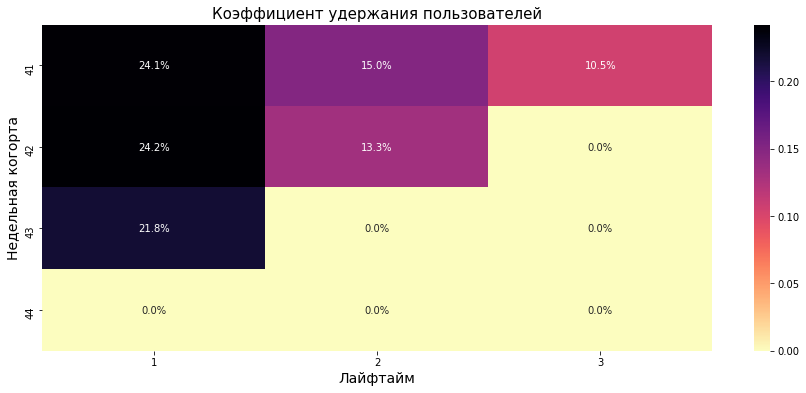

In [28]:
# График удержания по недельным когортам

plt.figure(figsize = (15,6))

sns.heatmap(week_retention(profiles), cmap="magma_r", annot= True, fmt='.1%')

plt.title('Коэффициент удержания пользователей', fontsize = 15)
plt.xlabel('Лайфтайм', fontsize = 14)
plt.ylabel('Недельная когорта', fontsize = 14)
plt.show()

Наблюдается снижение удержания пользователей, пришедших в последнюю неделю.

### Время, проведённое в приложении

Выделенных сессий в данных нет, поэтому я буду рассчитывать один день - как одну сессию. Посмотрю, какое время в приложении проводят пользователи в течение одной сессии и сколько событий совершается в пределах одной сессии.

In [29]:
# Отсортирую датасет и выделю день для сессий

sessions['date'] = pd.to_datetime(sessions['event_time']).dt.date
sessions_time = sessions.sort_values(['user_id', 'date'])

sessions_time.head(3)

,user_id,event_name,event_time,source,date
2171,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-07 13:39:45.989359,other,2019-10-07
2172,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-07 13:40:31.052909,other,2019-10-07
2173,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-07 13:41:05.722489,other,2019-10-07


In [30]:
# Добавлю столбцы с началом времени в сессии и концом, а также количеством событий в сессии

sessions_time = (
    sessions_time.groupby(['user_id','date','event_name'])
    .agg({'event_time': ['min', 'max'], 'event_name': 'count'})
    .reset_index()
)

sessions_time.columns = sessions_time.columns.droplevel(1)

sessions_time.head(3)

,user_id,date,event_name,event_time,event_time,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,tips_show,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,map,2019-10-09 18:33:55.577963,2019-10-09 18:35:28.260975,2
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,tips_show,2019-10-09 18:40:28.738785,2019-10-09 18:42:22.963948,2


In [31]:
# Переименую столбцы

sessions_time.columns = ['user_id','date', 'event_name', 'time_min','time_max','event_count']

In [32]:
# Добавлю столбец со временем за 1 сессию

sessions_time['time_sessions'] = sessions_time['time_max']-sessions_time['time_min']

sessions_time.head(3)

,user_id,date,event_name,time_min,time_max,event_count,time_sessions
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,tips_show,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9,0 days 00:09:55.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,map,2019-10-09 18:33:55.577963,2019-10-09 18:35:28.260975,2,0 days 00:01:32.683012
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,tips_show,2019-10-09 18:40:28.738785,2019-10-09 18:42:22.963948,2,0 days 00:01:54.225163


In [33]:
# Проверю самую длинную сессию

sessions_time['time_sessions'].max()

Timedelta('0 days 23:37:28.666352')

In [34]:
# Проверю самую короткую сессию

sessions_time['time_sessions'].min()

Timedelta('0 days 00:00:00')

Обнаружена нулевая сессия - "0 days 00:00:00", посмотрю, сколько таких всего.

In [35]:
sessions_null = sessions_time.query('time_sessions=="0 days 00:00:00"')
sessions_null.shape[0]

4762

In [36]:
# Сколько уникальных пользователей по таким сессиям

sessions_null['user_id'].nunique()

2430

Посмотрю, как нулевые сессии распределены по событиям.

In [37]:
sessions_null_event = (
    sessions_null.groupby('event_name')['event_count'].sum()
    .reset_index().
    sort_values(by='event_count', ascending=False)
)
sessions_null_event

,event_name,event_count
4,map,1162
6,search,825
8,tips_show,692
2,contacts_show,688
5,photos_show,527
0,advert_open,272
3,favorites_add,241
7,tips_click,207
1,contacts_call,148


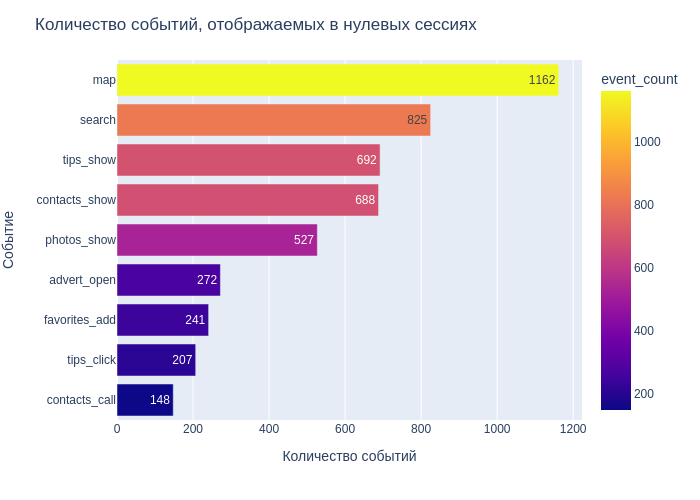

In [38]:
# строю столбчатую диаграмму 

fig = px.bar(sessions_null_event.sort_values(by='event_count', ascending=True), # загружаю данные и заново их сортирую
             x='event_count', # столбец с данными для оси X
             y='event_name', # столбец с данными для оси Y
             text='event_count', # добавляю аргумент, который отобразит текст с информацией
             color='event_count',
             color_discrete_sequence=[
                 px.colors.qualitative.T10[3],
                 px.colors.qualitative.Alphabet[11], 
               px.colors.qualitative.Set3[11],
               px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[7],
                 px.colors.qualitative.Set2[0],
                 px.colors.qualitative.Set2[3],
                 px.colors.qualitative.Alphabet[15]]                   
            )

fig.update_layout(title='Количество событий, отображаемых в нулевых сессиях',
                  showlegend=False,
                  xaxis_title='Количество событий',
                  yaxis_title='Событие')
fig.show("png")

In [39]:
# Посмотрю по количеству пользователей

sessions_null_event = (
    sessions_null.groupby('user_id')['event_count'].sum()
    .reset_index().
    sort_values(by='event_count', ascending=True)
)
sessions_null_event.head(3)

,user_id,event_count
1214,80a9887a-d45f-44a2-9473-1446f68b9c16,1
1017,6aed2242-353e-4527-a27b-ab235832003d,1
1016,6a9c836b-5381-4669-9570-a1b8152aaef1,1


In [40]:
sessions_null_event = (
    sessions_null_event.groupby('event_count')['user_id'].count()
    .reset_index()
    .sort_values(by='event_count', ascending=False)
)
sessions_null_event.head()

,event_count,user_id
18,23,1
17,22,1
16,19,3
15,18,1
14,17,1


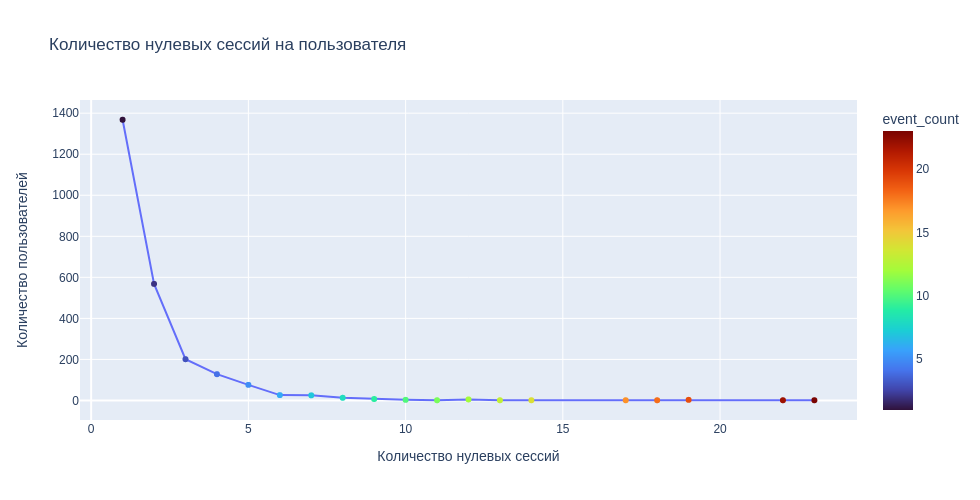

In [41]:
# Количество нулевых сессий на пользователя

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sessions_null_event['event_count'], 
    y=sessions_null_event['user_id'],
    mode='lines+markers',
    marker=dict(color=sessions_null_event['event_count'], colorbar=dict(title="event_count"), colorscale='turbo')
))

fig.update_layout(title="Количество нулевых сессий на пользователя",
                  xaxis_title="Количество нулевых сессий",
                  yaxis_title="Количество пользователей",
                  width=980,
                  height=500
                 )
fig.show("png")

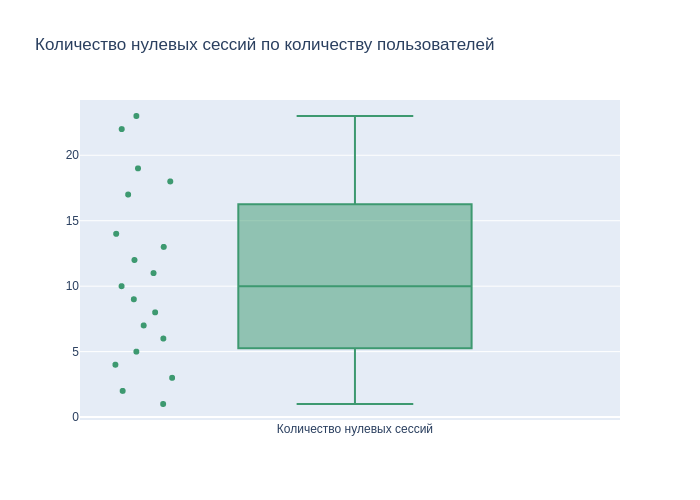

In [42]:
# Построю box

fig = go.Figure(data=[go.Box(y=sessions_null_event['event_count'],
            boxpoints='all',
            marker_color = '#3D9970',
            name='Количество нулевых сессий',
            jitter=0.3, 
            pointpos=-1.8 
              )])
fig.update_layout(title="Количество нулевых сессий по количеству пользователей")
fig.show("png")

Что это за нулевые сессии не понятно. Техническая ошибка? Нужно передать информацию тем, кто собирает данные.

In [43]:
# Сколько всего уникальных пользователей в сессиях

sessions_time['user_id'].nunique()

4293

In [44]:
# Посмотрю общую сумму времени, которую пользователи провели в приложении

sessions_time_sum = (
    sessions_time.groupby('user_id')['time_sessions'].sum()
    .reset_index()
    .sort_values(by='time_sessions', ascending = False)
)
sessions_time_sum.head()

,user_id,time_sessions
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,10 days 21:59:31.143064
401,1580911b-65db-4f1a-be7e-1ca39becac30,9 days 00:10:08.945077
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,8 days 07:38:55.326546
1161,43b5c2b3-b1da-4ed4-88c0-404de977ef41,6 days 20:17:19.701824
235,0d9e5bb7-0ad6-4b62-a118-b1e4f5b31dfa,6 days 08:28:10.691531


In [45]:
# Уберу сумму сессий, которая менее 1 минуты

sessions_time_sum = sessions_time_sum.query('time_sessions >= "0 days 00:01:00"')

In [46]:
# Посмотрю, сколько уникальных пользователей останется

sessions_time_sum['user_id'].nunique()

3930

In [47]:
(sessions_time['user_id'].nunique()) - (sessions_time_sum['user_id'].nunique())

363

Получается, что 363 пользователя по факту и не пользовались приложением в исследуемом периоде. За 1 минуту вряд ли можно найти нужную вещь. Разместить объявление за минуту тоже вряд ли. На самом деле таких пользователей может быть гораздо больше, ведь нет информации, сколько минимум времени необходимо, чтобы разместить объявление или найти нужную вещь.

**Вывод**

В исследуемых данных обнаружено 4762 строки с событиями, которые, якобы произошли за нулевое время. Откуда возникли такие данные неизвестно. Большинство таких нулевых событий - это открытие карты объявлений (1162 события).

У 1368 пользователей есть одно такое событие. А у одного пользователя их 23 штуки.

Еще у 363 уникальных пользователей сумма времени, проведенном в приложении менее 1 минуты.

### Частота действий пользователей

In [48]:
# Добавлю новый столбец

sessions['event'] = sessions['event_name']
sessions = sessions.replace({'event':{
    'advert_open':'Открыть объявление',
    'tips_show':'Просмотр рекомендованных объявлений',
    'map':'Просмотр карты объявлений',
    'contacts_show':'Посмотреть номер телефона',
    'tips_click':'Клик по рекомендованному объявлению',
    'photos_show':'Просмотр фотографий в объявлении',
    'favorites_add':'Добавление в избранное',
    'contacts_call':'Звонок по номеру телефона',
    'search':'Поиск по сайту'
}})

actions = sessions.groupby('event')['user_id'].count().reset_index()


actions = actions.sort_values(by='user_id', ascending=False)
actions

,event,user_id
7,Просмотр рекомендованных объявлений,40055
8,Просмотр фотографий в объявлении,10012
4,Поиск по сайту,6784
3,Открыть объявление,6164
5,Посмотреть номер телефона,4529
6,Просмотр карты объявлений,3881
0,Добавление в избранное,1417
2,Клик по рекомендованному объявлению,814
1,Звонок по номеру телефона,541


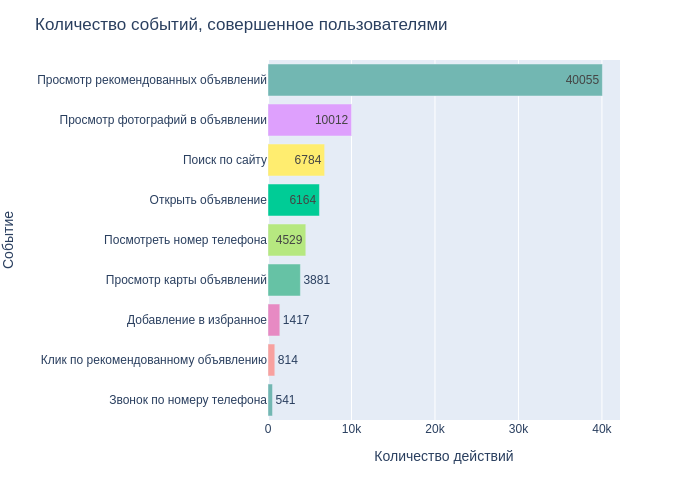

In [49]:
# строю столбчатую диаграмму 

fig = px.bar(actions.sort_values(by='user_id', ascending=False), # загружаю данные и заново их сортирую
             x='user_id', # столбец с данными для оси X
             y='event', # столбец с данными для оси Y
             text='user_id', # добавляю аргумент, который отобразит текст с информацией
             color='event',
             color_discrete_sequence=[
                 px.colors.qualitative.T10[3],
                 px.colors.qualitative.Alphabet[11], 
               px.colors.qualitative.Set3[11],
               px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[7],
                 px.colors.qualitative.Set2[0],
                 px.colors.qualitative.Set2[3],
                 px.colors.qualitative.Alphabet[15]]                   
            )

fig.update_layout(title='Количество событий, совершенное пользователями',
                  showlegend=False,
                  xaxis_title='Количество действий',
                  yaxis_title='Событие')
fig.show("png")

In [50]:
# Посмотрю активность пользователей по событиям по дням недели

week_event = sessions

week_event['weekday'] = week_event['event_time'].dt.weekday

In [51]:
week_event = week_event.groupby(['weekday', 'event_name'])['user_id'].count().reset_index().sort_values(by='user_id')
week_event.head(3)

,weekday,event_name,user_id
37,4,contacts_call,53
46,5,contacts_call,67
55,6,contacts_call,70


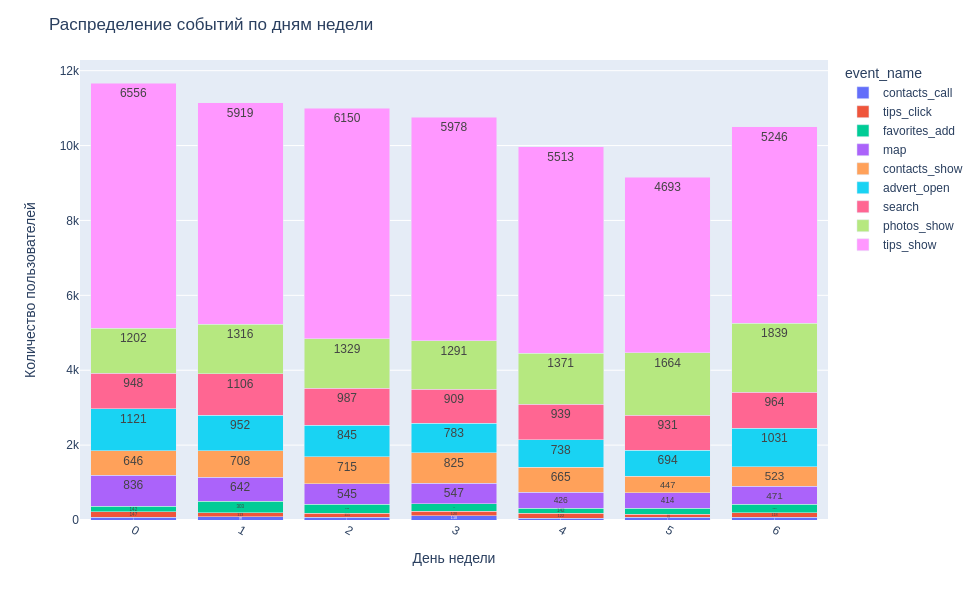

In [52]:
fig = px.bar(
    week_event,
    x='weekday',
    y='user_id', 
    width=980, 
    height=600, 
    color='event_name',
    text='user_id'
)

fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Распределение событий по дням недели',
    xaxis_title='День недели',
    yaxis_title='Количество пользователей',
    barmode='stack'
)

fig.show("png")

**Вывод**

Самое большое количество действий у события 'Просмотр рекомендованных объявлений'. Вероятно, это главная страница приложения, с которой все и начинается. 10012 просмотров фотографий в объявлении, 6784 поисков по сайту и 6164 открытых объявлений.

Меньше всего совершено звонков по номеру телефона.

Больше всего пользователи активны в понедельник и менее всего в субботу. А вот целевое действие 'Просмотр номера телефона' пользователи чаще всего совершают в четверг.

### Конверсия в целевое действие — просмотр контактов

In [53]:
sessions['user_id'].nunique()

4293

In [54]:
# Сделаю срез по событию

conversion = sessions.query('event=="Посмотреть номер телефона"')
conversion['user_id'].nunique()

981

In [55]:
a = round((conversion['user_id'].nunique()/sessions['user_id'].nunique()*100),2)
display('Конверсия уникальных пользователей по событию "Посмотреть номер телефона":', a)

'Конверсия уникальных пользователей по событию "Посмотреть номер телефона":'

22.85

Теперь посчитаю в разрезе количества событий.

Основное целевое действие, это - просмотр номера телефона (4529 действий). Не все пользователи предпочитают звонить из приложения и звонить прямо сейчас. Многим удобнее записать номер и позвонить не через приложение в удобное для себя время.

Все события не последовательны, в конверсию 'просмотр контактов' можно перейти из нескольких событий.

Я сформирую явную последовательность:
- 'Просмотр рекомендованных объявлений' - это явно первая страница, с которой начинаются действия пользователей.
- 'Открыть объявление' - чтобы увидеть нужный номер, без открытия объявления никак не обойтись
- 'Посмотреть номер телефона' - само целевое действие

In [56]:
# Подготовлю таблицу

sessions_new = sessions.loc[((sessions['event'] == 'Просмотр рекомендованных объявлений') |
    (sessions['event'] == 'Открыть объявление') |
    (sessions['event'] == 'Посмотреть номер телефона'))
]
sessions_new = sessions_new.groupby('event').agg({'user_id':'nunique'}).reset_index().sort_values(by='user_id', ascending=False)

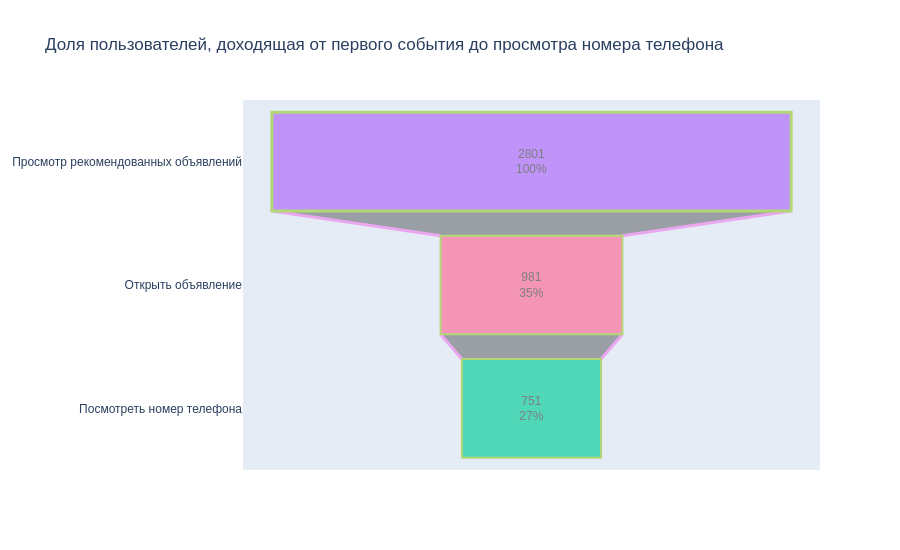

In [57]:
# Построю воронку событий

fig = go.Figure(go.Funnel(
    y = ["Просмотр рекомендованных объявлений", "Открыть объявление", "Посмотреть номер телефона"],
    x = sessions_new['user_id'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#AB63FA", "#FF6692", "#00CC96"],
    "line": {"width": [3, 2, 2], "color": ["yellowgreen", "yellowgreen", "yellowgreen"]}},
    connector = {"line": {"color": "violet", "dash": "solid", "width": 3}})
    )
fig.update_layout(title='Доля пользователей, доходящая от первого события до просмотра номера телефона', width=900, height=550)
fig.show("png")

**Вывод**

Конверсия всех уникальных пользователей в событие 'Просмотр контактов' составляет 22.85%.


Все события не последовательны, в конверсию 'Просмотр контактов' можно перейти из нескольких событий.


Я сформировала явную последовательность:

- 'Просмотр рекомендованных объявлений' - это явно первая страница, с которой начинаются действия пользователей.
- 'Открыть объявление' - чтобы увидеть нужный номер, без открытия объявления никак не обойтись
- 'Посмотреть номер телефона' - само целевое действие

Основная потеря в данной воронке событий проходит от момента просмотра рекомендованных объявлений до открытия нужного объявления (конверсия 35%). Необходимо проверить алгоритм показа рекомендованных объявлений. Возможно есть способы настроить его лучше и тем самым увеличить конверсию пользователей в целевое событие 'Просмотр контактов'. Конверсия из события 'Открыть объявление' в событие 'Просмотр контактов' составляет 27%.

## Сегментация пользователей на основе их действий

Необходимо произвести сегментацию пользователей.

Цель данной сегментации в том, чтобы выявить группы, у которых меньше конверсия, а так же, которые хуже удерживаются.

Я хочу провести сегментацию пользователей по времени суток, когда они пользуются приложением. 

Сегментировав пользователей по времени суток, можно будет воздействовать прицельно на группы и их пользовательскую активность, что в свою очередь может позволить увеличить конверсию и удержание пользователей.

Разделю на 4 группы:
- ночные - с 0 часов до 6 утра
- утренние - с 6 часов утра до 12 дня
- дневные - с 12 до 18 часов
- вечерние с 18 до 24

### Сегментация пользователей по времени, проведенном в приложении

В ранее созданные профили пользователей добавлю столбец с часом суток, из столбца с первым заходом в приложение. Затем создам столбец с группой.

In [58]:
profiles['hour'] = profiles['first_ts'].dt.hour

# Добавлю новый столбец с группой

def f(row):
    if (row['hour'] >= 0) &  (row['hour'] < 6):
        val = 'Ночь'
    elif (row['hour'] >= 6) &  (row['hour'] < 12):
        val = 'Утро'
    elif (row['hour'] >= 12) &  (row['hour'] < 18):
        val = 'День'
    else: 
        val = 'Вечер'
    return val

profiles['group'] = profiles.apply (f, axis=1)

profiles.head(3)

,user_id,first_ts,source,dt,month,week,hour,group
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,41,13,День
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,yandex,2019-10-19,2019-10-01,42,21,Вечер
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,yandex,2019-11-01,2019-11-01,44,13,День


In [59]:
# Сформирую срез для групп и добавлю столбцы с выделенным номером недели

profiles_1 = profiles.query('group=="Ночь"')
profiles_1['week'] = pd.to_datetime(profiles_1['first_ts']).dt.week
profiles_2 = profiles.query('group=="Утро"')
profiles_2['week'] = pd.to_datetime(profiles_2['first_ts']).dt.week
profiles_3 = profiles.query('group=="День"')
profiles_3['week'] = pd.to_datetime(profiles_3['first_ts']).dt.week
profiles_4 = profiles.query('group=="Вечер"')
profiles_4['week'] = pd.to_datetime(profiles_4['first_ts']).dt.week


In [60]:
display('Количество действий в ночной группе:', profiles_1.shape[0])
display('Количество действий в утренней группе:', profiles_2.shape[0])
display('Количество действий в дневной группе:', profiles_3.shape[0])
display('Количество действий в вечерней группе:', profiles_4.shape[0])

'Количество действий в ночной группе:'

221

'Количество действий в утренней группе:'

943

'Количество действий в дневной группе:'

1713

'Количество действий в вечерней группе:'

1416

**Вывод**

Выделены 4 группы:
- ночная
- утренняя
- дневная
- вечерняя

Самые активные группы по действиям - дневная и вечерняя. Самая малоактивная - ночная. Проверю, как удерживаются пользователи по группам.

### Retention rate, по сегментированным пользователям

In [61]:
# Retention rate для ночной группы

retention_1 = get_retention(profiles_1)
retention_1.head(3)

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,21,22,23
dt,,,,,,,,,,,,,,,,,,,,,
2019-10-07,0.111111,0.000000,0.333333,0.0,0.000000,0.111111,0.0,0.0,0.111111,0.111111,...,0.111111,0.111111,0.0,0.111111,0.0,0.0,0.111111,0.000000,0.111111,0.222222
2019-10-08,0.000000,0.000000,0.000000,0.2,0.000000,0.200000,0.0,0.2,0.000000,0.000000,...,0.200000,0.000000,0.0,0.200000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2019-10-09,0.000000,0.166667,0.000000,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.000000


In [62]:
# По недельным когортам

week_retention(profiles_1)

,1,2,3
week,,,
41,0.280702,0.192982,0.175439
42,0.323529,0.132353,0.000000
43,0.250000,0.000000,0.000000
44,0.000000,0.000000,0.000000


In [63]:
# Retention rate для утренней группы

retention_2 = get_retention(profiles_2)
retention_2.head(3)

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,
2019-10-07,0.209302,0.116279,0.116279,0.046512,0.069767,0.069767,0.116279,0.023256,0.069767,0.046512,...,0.000000,0.023256,0.000000,0.000000,0.023256,0.046512,0.023256,0.023256,0.023256,0.023256
2019-10-08,0.191489,0.127660,0.063830,0.042553,0.063830,0.063830,0.042553,0.063830,0.063830,0.085106,...,0.042553,0.000000,0.021277,0.021277,0.000000,0.021277,0.085106,0.042553,0.000000,0.000000
2019-10-09,0.044444,0.111111,0.044444,0.044444,0.133333,0.022222,0.066667,0.088889,0.044444,0.022222,...,0.022222,0.000000,0.022222,0.022222,0.022222,0.000000,0.022222,0.044444,0.044444,0.000000


In [64]:
# По недельным когортам

week_retention(profiles_2)

,1,2,3
week,,,
41,0.223577,0.121951,0.097561
42,0.226923,0.134615,0.000000
43,0.172131,0.000000,0.000000
44,0.000000,0.000000,0.000000


In [65]:
# Retention rate для дневной группы

retention_3 = get_retention(profiles_3)
retention_3.head(3)

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,
2019-10-07,0.098765,0.111111,0.111111,0.049383,0.024691,0.061728,0.074074,0.086420,0.049383,0.049383,...,0.037037,0.049383,0.012346,0.037037,0.037037,0.049383,0.049383,0.074074,0.074074,0.037037
2019-10-08,0.154930,0.126761,0.056338,0.028169,0.056338,0.028169,0.056338,0.014085,0.028169,0.028169,...,0.014085,0.014085,0.042254,0.028169,0.028169,0.028169,0.028169,0.014085,0.028169,0.014085
2019-10-09,0.095890,0.013699,0.027397,0.068493,0.054795,0.095890,0.082192,0.054795,0.027397,0.027397,...,0.013699,0.013699,0.041096,0.000000,0.041096,0.027397,0.000000,0.000000,0.013699,0.000000


In [66]:
# По недельным когортам

week_retention(profiles_3)

,1,2,3
week,,,
41,0.247379,0.159329,0.1174
42,0.213793,0.110345,0.0000
43,0.230599,0.000000,0.0000
44,0.000000,0.000000,0.0000


In [67]:
# Retention rate для вечерней группы

retention_4 = get_retention(profiles_4)
retention_4.head(3)

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,
2019-10-07,0.098592,0.084507,0.070423,0.070423,0.042254,0.042254,0.070423,0.042254,0.028169,0.042254,...,0.014085,0.056338,0.042254,0.000000,0.000000,0.000000,0.000000,0.014085,0.028169,0.028169
2019-10-08,0.159091,0.136364,0.045455,0.045455,0.090909,0.068182,0.136364,0.113636,0.045455,0.090909,...,0.045455,0.045455,0.090909,0.068182,0.022727,0.022727,0.022727,0.045455,0.045455,0.022727
2019-10-09,0.076923,0.076923,0.115385,0.096154,0.019231,0.019231,0.076923,0.057692,0.038462,0.019231,...,0.019231,0.019231,0.019231,0.019231,0.019231,0.000000,0.000000,0.038462,0.000000,0.000000


In [68]:
# По недельным когортам

week_retention(profiles_4)

,1,2,3
week,,,
41,0.237143,0.151429,0.082857
42,0.267990,0.156328,0.000000
43,0.230986,0.000000,0.000000
44,0.000000,0.000000,0.000000


**Вывод**

Лучше всего удерживается ночная группа. Но удержание пользователей, пришедших на последней неделе, падает.

Также, хорошо удерживаются пользователи вечерней группы. Но снижение удержания пользователей последней недели тоже очевидно.

Утренние и дневные пользователи удерживаются примерно на одном уровне. Однако, у дневных пользователей заметен рост удержания пользователей, пришедших в последнюю неделю.

### Конверсия в целевое действие — просмотр контактов, по сегментированным пользователям

In [69]:
profiles_1 = profiles_1.merge(sessions[['user_id','event']], on='user_id', how='left')
profiles_2 = profiles_2.merge(sessions[['user_id','event']], on='user_id', how='left')
profiles_3 = profiles_3.merge(sessions[['user_id','event']], on='user_id', how='left')
profiles_4 = profiles_4.merge(sessions[['user_id','event']], on='user_id', how='left')


In [70]:
conversion_1 = profiles_1.query('event=="Посмотреть номер телефона"')
conversion_2 = profiles_2.query('event=="Посмотреть номер телефона"')
conversion_3 = profiles_3.query('event=="Посмотреть номер телефона"')
conversion_4 = profiles_4.query('event=="Посмотреть номер телефона"')


In [71]:
a = round((conversion_1['user_id'].nunique()/profiles_1['user_id'].nunique()*100),2)
b = round((conversion_2['user_id'].nunique()/profiles_2['user_id'].nunique()*100),2)
c = round((conversion_3['user_id'].nunique()/profiles_3['user_id'].nunique()*100),2)
d = round((conversion_4['user_id'].nunique()/profiles_4['user_id'].nunique()*100),2)

display('Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для ночной группы:', a)
display('Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для утренней группы:', b)
display('Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для дневной группы:', c)
display('Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для вечерней группы:', d)

'Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для ночной группы:'

18.1

'Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для утренней группы:'

23.22

'Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для дневной группы:'

24.52

'Конверсия уникальных пользователей по событию "Посмотреть номер телефона" для вечерней группы:'

21.33

**Вывод**

Самая большая конверсия в событие 'Посмотреть номер телефона' у дневной группы. 

Самая низкая у ночной. Есть вероятность, что они откладывают просмотр и звонок на дневное время, ведь ночью звонить нелогично. Но тут можно потерять также этих клиентов, днем они могут уже забыть или передумать звонить и покупать вещь. Можно ночным пользователям добавить, например, всплывающее сообщение, что они могут записать контакт прямо сейчас и позвонить утром. Или напомнить добавить объявление в избранное.

## Проверка статистических гипотез

### Гипотеза: Конверсия пользователей, установивших приложение из разных источников, равны.

In [72]:
# Сделаю таблицу по группам и событиям для проведения тестов

sessions_test = sessions.pivot_table(index='source', columns = 'event', values = 'user_id', aggfunc = 'nunique')

# Добавлю столбец с общей численностью

sessions_test['total_number'] = sessions.groupby('source')['user_id'].nunique()


sessions_test.columns.name = None
sessions_test

,Добавление в избранное,Звонок по номеру телефона,Клик по рекомендованному объявлению,Открыть объявление,Поиск по сайту,Посмотреть номер телефона,Просмотр карты объявлений,Просмотр рекомендованных объявлений,Просмотр фотографий в объявлении,total_number
source,,,,,,,,,,
google,114,67,71,195,485,275,354,651,363,1129
other,77,54,101,259,557,228,415,840,289,1230
yandex,160,92,150,297,624,478,687,1310,443,1934


In [73]:
# Сколько пользователей в каждой экспериментальной группе

sessions.groupby('source')['user_id'].nunique()

source
google    1129
other     1230
yandex    1934
Name: user_id, dtype: int64

In [74]:
# Проверю, не попали ли пользователи сразу в несколько групп

(
sessions
    .groupby('user_id')
    .agg({'source':'nunique'})
    .query('source>1')
)

# пусто, значит, пересечений нет

,source
user_id,


In [75]:
# Создам переменные групп по событиям

google = sessions_test.iloc[0][[0,1,2,3,4,5,6,7,8,9]]

other = sessions_test.iloc[1][[0,1,2,3,4,5,6,7,8,9]]

yandex = sessions_test.iloc[2][[0,1,2,3,4,5,6,7,8,9]]

In [76]:
# Функция для проведения теста

def z_value_count(purchases1, purchases2, leads1, leads2, alpha = 0.01):
    purchases = np.array([purchases1, purchases2])
    leads = np.array([leads1,leads2])
# пропорция успехов в первой группе:
    p1 = purchases[0]/leads[0]

        # пропорция успехов во второй группе:
    p2 = purchases[1]/leads[1]

    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])

        # разница пропорций в датасетах
    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2 

    print('p-значение: ', p_value)

    if p_value < alpha: 
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
            )

#### Проверка групп google и other

**Событие: Посмотреть номер телефона.**
- Гипотеза Н_0: Конверсия пользователей, установивших приложение из google и other, равна.
- Гипотеза Н_1: Конверсия пользователей, установивших приложение изиз google и other,  не равна.

In [77]:
z_value_count(google[5], other[5], google[9], other[9])

p-значение:  0.0005640941887214979
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Проверка групп google и yandex	

**Событие: Посмотреть номер телефона.**
- Гипотеза Н_0: Конверсия пользователей, установивших приложение из google и yandex, равна.
- Гипотеза Н_1: Конверсия пользователей, установивших приложение изиз google и yandex,  не равна.

In [78]:
z_value_count(google[5], yandex[5], google[9], yandex[9])

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Проверка групп other и yandex

**Событие: Посмотреть номер телефона.**
- Гипотеза Н_0: Конверсия пользователей, установивших приложение из other и yandex, равна.
- Гипотеза Н_1: Конверсия пользователей, установивших приложение изиз other и yandex,  не равна.

In [79]:
z_value_count(other[5], yandex[5], other[9], yandex[9])

p-значение:  4.7142597613403225e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод**

Различий в конверсиях в событие 'Посмотреть номер телефона' между пользователями, установившими приложение из Яндекс или Гугла, нет. А вот между остальными источниками и Яндекс/Гугл есть статистическое различие.

## Вывод и рекомендации

1. В моем распоряжении были данные о событиях, совершенных в мобильном приложении "Ненужные вещи". Была проведена предобработка данных.

2. Полные данные в датасете за период с 7.10.2019 по 3.11.2019. 

3. Пользователи привлекаются из трех групп:  Яндекса, Гугла и иных источников. Больше всего привлеченных пользователей из Яндекса. 
4. Наблюдается снижение удержания пользователей, пришедших в последнюю неделю. 

5. В исследуемых данных обнаружено 4762 строки с событиями, которые, якобы, произошли за нулевое время. Откуда возникли такие данные неизвестно. Большинство таких нулевых событий - это открытие карты объявлений (1162 события).

У 1368 пользователей есть одно такое событие. А у одного пользователя их 23 штуки.

Еще у 363 уникальных пользователей сумма времени, проведенном в приложении менее 1 минуты. Вряд ли возможно что-то успеть за это время.

6. Пользователи совершают следующие события:
- Просмотр рекомендованных объявлений - 40055 событий
- Просмотр фотографий в объявлении - 10012 событий
- Поиск по сайту - 6784 событий
- Открыть объявление - 6164 событий
- Посмотреть номер телефона - 4529 событий
- Просмотр карты объявлений	- 3881 событий
- Добавление в избранное - 1417 событий
- Клик по рекомендованному объявлению - 814 событий
- Звонок по номеру телефона	- 541 событий

Целевое действие: Посмотреть номер телефона. Конверсия уникальных пользователей по событию "Посмотреть номер телефона": 22.85%.

7. Была проведена сегментация пользователей на 4 группы:
- ночные - с 0 часов до 6 утра
- утренние - с 6 часов утра до 12 дня
- дневные - с 12 до 18 часов
- вечерние с 18 до 24

Самые активные группы по действиям - дневная и вечерняя. Самая малоактивная - ночная. Лучше всего удерживается ночная группа. Также, хорошо удерживаются пользователи вечерней группы. Утренние и дневные пользователи удерживаются примерно на одном уровне. Однако, у дневных пользователей заметен рост удержания пользователей, пришедших в последнюю неделю. Самая большая конверсия в событие 'Посмотреть номер телефона' у дневной группы. Самая низкая у ночной.

8. Была проверена потеза:
- Гипотеза: Конверсия пользователей, установивших приложение из разных источников, равны.

Различий в конверсиях в событие 'Посмотреть номер телефона' между пользователями, установившими приложение из Яндекс или Гугла, нет. А вот между остальными источниками и Яндекс/Гугл есть статистическое различие.

Могу порекомендовать: обратить внимание на пользователей, которые уходят сразу после одного дня. Предложить им какой-то "вип-статус", например, на неделю пользования. Или скидку на продвижение объявлений в первые дни и тп. Необходимо их лучше удерживать, что может помочь увеличть конверсию в целевое действие. Можно продумать этот момент и запустить новый А/Б тест. Так же проверить алгоритм показа рекомендованных объявлений.

Обратить внимание на ночных пользователей, какие образом им напомнить утром/днем, чтоб они не забыли позвонить по ранее просмотренным объявлениям, плюс ночью напоминать добавлять в избранное, например.

Различий в удержании пользователей между Яндекс и Гуглом нет. Однако, количество новых пользователей падает. Возможно, пришло время запустить новую рекламу, в том числе, возможно, обратить внимание на новые рекламные площадки для развития приложения.

Конверсия у пользователей, которые совершили первое действие в будни - выше. И разница статистически значима. Добавить больше рекламы в выходные дни, добавить скидки на продвижение и тп.

В целом данных недостаточно, чтоб дать точную оценку. Не выделены сессии пользователей. Рекомендую провести дополнительное исследование по более полным данным.